In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def fit_step(folders, fit_name):
    all_fits = pd.DataFrame(columns=['er_sample_name', 'measurement_step_max', 'specimen_comp_name'])
    for name in folders:
        DeI2 = pd.read_csv('./'+name+'/pmag_specimens.txt', header=1, 
                           sep='\t', usecols=('er_sample_name', 
                                              'measurement_step_max', 
                                              'specimen_comp_name'))
        DeI2_ht = DeI2.loc[DeI2['specimen_comp_name']==fit_name]
        DeI2_ht.reset_index(inplace=True, drop=True)
        for i in range(len(DeI2_ht)):
            DeI2_ht.measurement_step_max[i] = DeI2_ht.measurement_step_max[i] - 273
        all_fits = all_fits.append(DeI2_ht)
    return all_fits

In [3]:
%cd '../magic_files/Thermal/Host_rock/'
#%cd '../magic_files/Thermal/'

/Users/lukefairchild765/GitHub_files/2015_Breccia_Dikes/Data/magic_files/Thermal/Host_rock


In [4]:
#folders = !ls
folders=['PI32', 'PI33', 'PI34']
#folders.remove('Host_rock')
flows_MT = fit_step(folders, 'MT')
flows_HT = fit_step(folders, 'HT')
# breccia = fit_step(folders)

/Users/lukefairchild765/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/lukefairchild765/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/lukefairchild765/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
%cd '../../../'

/Users/lukefairchild765/GitHub_files/2015_Breccia_Dikes/Data


In [6]:
# breccia.reset_index(inplace=True,drop=True)
# flows_HT.reset_index(inplace=True,drop=True)
# flows_MT.reset_index(inplace=True,drop=True)
# flows_HT.to_csv('./baked_contact_analysis/flows_HT.csv')
# flows_MT.to_csv('./baked_contact_analysis/flows_MT.csv')
#breccia.to_csv('../../baked_contact_analysis/breccia_max_temp.csv')

In [6]:
host = pd.read_csv('../../baked_contact_analysis/baked_contact.csv')
host = host.fillna(0.1)
host.head()

,sample,max_temp,distance_m,dis_norm
0,PI24-16a,375,0.86,0.330769
1,PI24-17a,400,1.13,0.434615
2,PI24-18a,500,0.56,0.215385
3,PI24-20a,570,0.06,0.023077
4,PI24-21a,560,0.50,0.192308


In [7]:
%cd '../../baked_contact_analysis'

/Users/lukefairchild765/GitHub_files/2015_Breccia_Dikes/Data/baked_contact_analysis


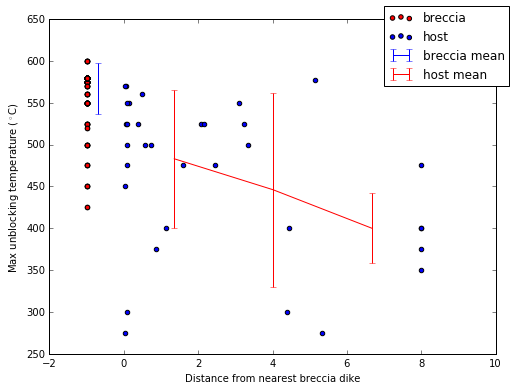

In [15]:
plt.figure(figsize=(8,6))

data_plt_x = []
data_plt_y = []
for i in range(len(breccia)):
    data_plt_x.append(-0.5)
    data_plt_y.append(breccia.measurement_step_max[i])
    if i==0:
        plt.scatter(-1,breccia.measurement_step_max[i],c='r',label="breccia")
    else:
        plt.scatter(-1,breccia.measurement_step_max[i],c='r')
breccia_mean_temp = np.mean(data_plt_y)
breccia_std = np.std(data_plt_y)
plt.errorbar(-0.7,breccia_mean_temp, yerr=breccia_std,label='breccia mean')

data_plt_x = []
data_plt_y = []

for i in range(len(host)):
    data_plt_x.append(host.distance_m[i])
    data_plt_y.append(host.max_temp[i])
    if i==0:
        plt.scatter(host.distance_m[i],host.max_temp[i],c='b',label="host")
    else:
        plt.scatter(host.distance_m[i],host.max_temp[i],c='b')
x = np.array(data_plt_x)
y = np.array(data_plt_y)
nbins = 3

n, _ = np.histogram(x, bins=nbins)
sy, _ = np.histogram(x, bins=nbins, weights=y)
sy2, _ = np.histogram(x, bins=nbins, weights=y*y)
mean = sy / n
std = np.sqrt(sy2/n - mean*mean)

#plt.scatter(x, y)
plt.errorbar((_[1:] + _[:-1])/2, mean, yerr=std, fmt='r-',label='host mean')
plt.legend(loc=(0.75,0.8))
plt.xlabel('Distance from nearest breccia dike')
plt.ylabel('Max unblocking temperature ($^\circ$C)')
plt.savefig('baked_contact.pdf')
plt.show()